<a href="https://colab.research.google.com/github/OSGeoLabBp/tutorials/blob/master/english/machine_learning/lessons/keras_create.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Common functions

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential, model_from_json
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.preprocessing import image
from keras import datasets, layers, models
from keras import utils
from keras import regularizers
from keras.utils import to_categorical
from keras.optimizers import SGD

In [9]:
class_labels = [
    "airplane",
    "car",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
]

In [27]:
# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    plt.tight_layout()
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    plt.legend()
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    plt.legend()
    # save plot to file
    #filename = sys.argv[0].split('/')[-1]
    #pyplot.savefig(filename + '_plot.png')
    #pyplot.close()

def save_model(model, name):
    # Save neural network structure
    model_structure = model.to_json()
    f = open(name+".json", "w")
    f.write(model_structure)
    # Save neural network's trained weights
    model.save_weights(name+".weights.h5")

def load_model(name):
    # Load the json file that contains the model's structure
    f = open(name+".json")
    my_model_structure = f.read()
    # Recreate the Keras model object from the json data
    my_model = model_from_json(my_model_structure)
    # Re-load the model's trained weights
    my_model.load_weights(name+".weights.h5")
    return my_model

# Preparing data

In [20]:
# Load data set
x_train, y_train, x_test, y_test = load_dataset()
# Normalize data set to 0-to-1 range
x_train, x_test = prep_pixels(x_train, x_test)
print(f"Image size: {x_train.shape()[1:]}")
# Convert class vectors to binary class matrices
#y_train = keras.utils.to_categorical(y_train, 10)
#y_test = keras.utils.to_categorical(y_test, 10)

 # First try

In [22]:
# Create a model and add layers
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
%%time
epochs = 50
# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=epochs, validation_data=(x_test, y_test), shuffle=True)

Epoch 1/50
782/782 [==============================] - 7s 8ms/step - loss: 0.4464 - accuracy: 0.8423 - val_loss: 0.6331 - val_accuracy: 0.7895
Epoch 2/50
782/782 [==============================] - 6s 8ms/step - loss: 0.4293 - accuracy: 0.8486 - val_loss: 0.6217 - val_accuracy: 0.7951
Epoch 3/50
782/782 [==============================] - 6s 8ms/step - loss: 0.4278 - accuracy: 0.8474 - val_loss: 0.6186 - val_accuracy: 0.8010
Epoch 4/50
782/782 [==============================] - 6s 8ms/step - loss: 0.4216 - accuracy: 0.8501 - val_loss: 0.6264 - val_accuracy: 0.7995
Epoch 5/50
782/782 [==============================] - 6s 8ms/step - loss: 0.4137 - accuracy: 0.8507 - val_loss: 0.6319 - val_accuracy: 0.7956
Epoch 6/50
782/782 [==============================] - 6s 8ms/step - loss: 0.3980 - accuracy: 0.8592 - val_loss: 0.6345 - val_accuracy: 0.7998
Epoch 7/50
782/782 [==============================] - 7s 9ms/step - loss: 0.3991 - accuracy: 0.8577 - val_loss: 0.6173 - val_accuracy: 0.7980
Epoch 

In [26]:
# save the model
save_model(model, "first")

TODO test all models

In [ ]:
!wget -q -O dog.jpg https://cdn.britannica.com/79/232779-050-6B0411D7/German-Shepherd-dog-Alsatian.jpg

In [ ]:
img = image.load_img("dog.jpg", target_size=(32, 32))

In [ ]:
list_of_images = np.zeros((1, 32, 32, 3))
image_to_test = image.img_to_array(img)
list_of_images[0] = image_to_test

In [ ]:
results = model.predict(list_of_images)
single_result = results[0]
likely_class_indices = np.argsort(single_result)[::-1]
for i in likely_class_indices:
    if single_result[likely_class_indices[i]] > 0.099999:
        print(f"Image is a {class_labels[i]} - Likelihood: {single_result[likely_class_indices[i]]:.2%}")

1/1 [==============================] - 0s 25ms/step
Image is a airplane - Likelihood: 100.00%


# Second try

In [ ]:
#(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Checking the number of rows (records) and columns (features)
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

# Checking the number of unique classes
print(np.unique(train_labels))
print(np.unique(test_labels))

# Creating a list of all the class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Visualizing some of the images from the training dataset
plt.figure(figsize=[10,10])
for i in range (25):    # for first 25 images
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
# Converting the pixels data to float type
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Standardizing (255 is the total number of pixels an image can have)
train_images = train_images / 255
test_images = test_images / 255

# One hot encoding the target class (labels)
num_classes = 10
train_labels = utils.to_categorical(train_labels, num_classes)
test_labels = utils.to_categorical(test_labels, num_classes)

# Creating a sequential model and adding layers to it

model = Sequential()

model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))    # num_classes = 10

# Checking the model summary
model.summary()

In [ ]:
%%time
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

history = model.fit(train_images, train_labels, batch_size=64, epochs=100,
                    validation_data=(test_images, test_labels))

# Save neural network structure
model_structure = model.to_json()
f = open("model1_structure.json", "w")
f.write(model_structure)
# Save neural network's trained weights
model.save_weights("model1.weights.h5")

Text(0.5, 1.0, 'Loss Curves')

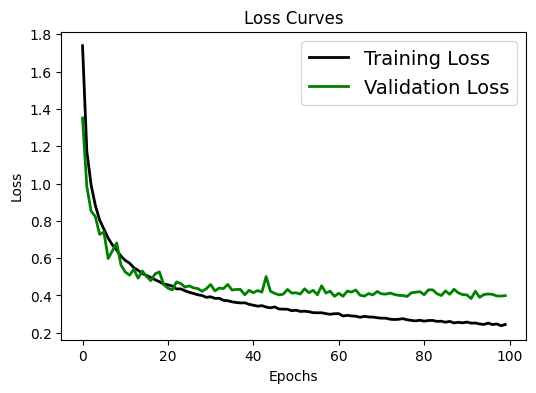

In [8]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

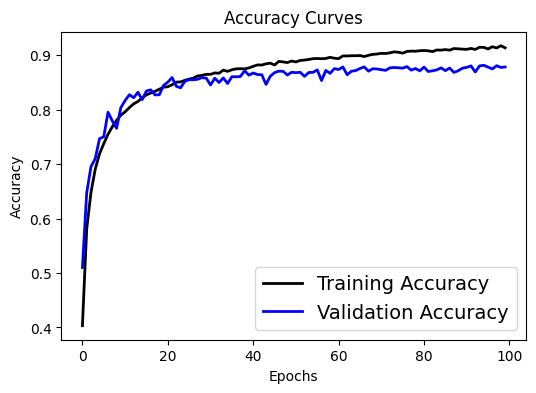

In [9]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

313/313 [==============================] - 2s 3ms/step
[[1.00685238e-05 3.23621606e-07 2.31759870e-04 ... 1.59056157e-07
  3.16999802e-07 1.01852393e-08]
 [1.01178797e-04 8.34380568e-04 5.27723465e-09 ... 4.50569894e-11
  9.99064386e-01 1.74068902e-07]
 [1.88556705e-02 7.18580723e-01 3.99825658e-05 ... 1.40845907e-04
  2.61280656e-01 8.23445152e-04]
 ...
 [1.81956020e-10 8.53978166e-10 1.14111135e-05 ... 3.35561617e-06
  2.13314544e-09 1.65202452e-09]
 [4.21320647e-03 9.93939400e-01 1.47702776e-05 ... 5.94913618e-05
  9.30815349e-06 1.43336511e-04]
 [5.21920784e-10 1.04970199e-09 1.24851338e-08 ... 9.99945998e-01
  2.90813096e-10 1.07392442e-10]]
[3 8 1 ... 5 1 7]


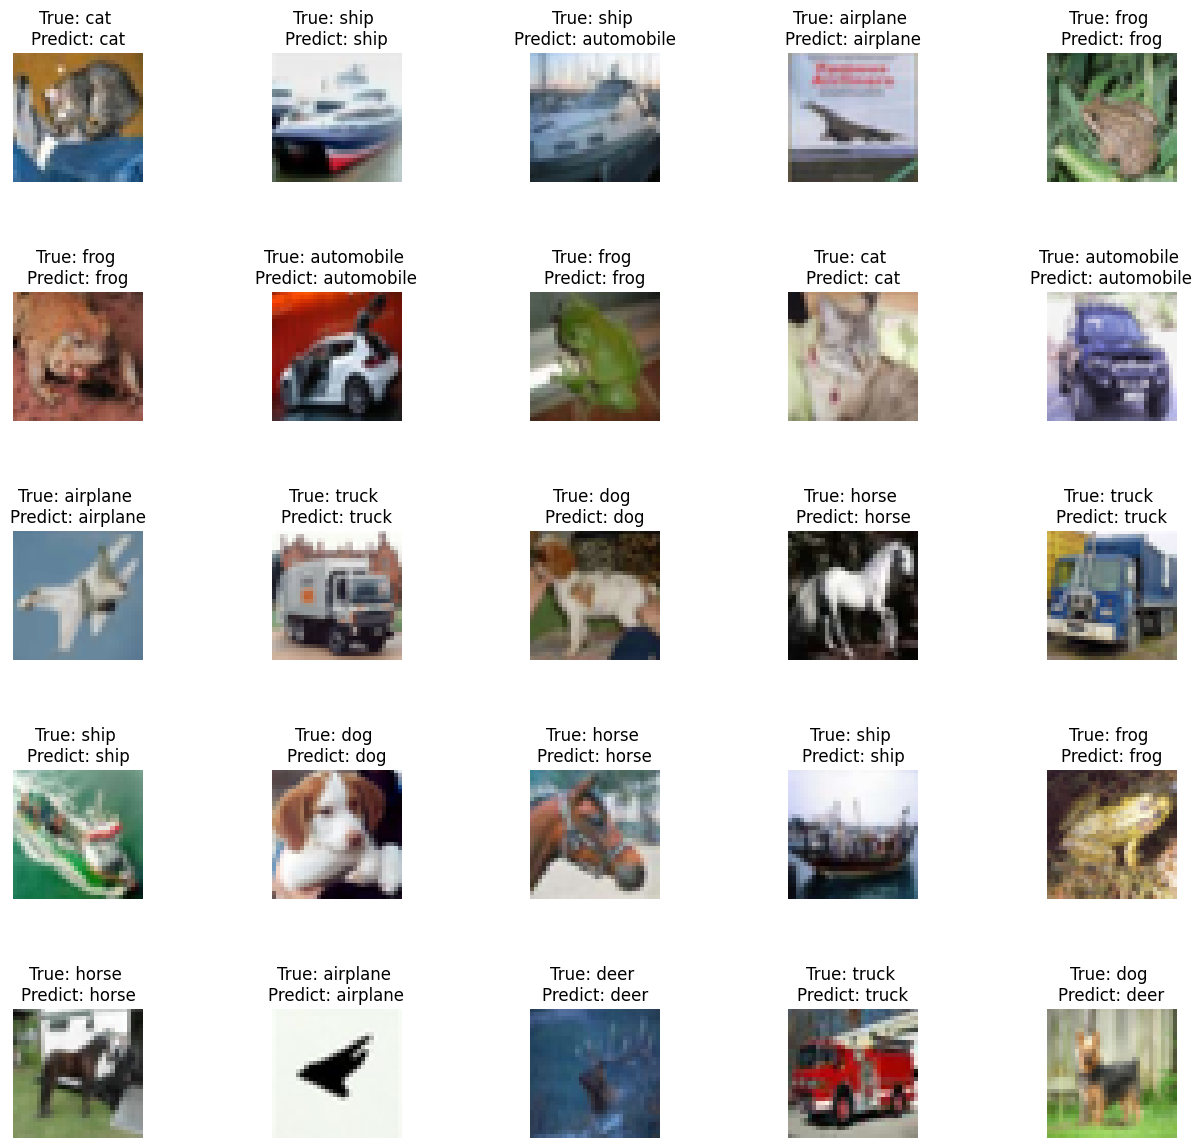

In [10]:
# Making the Predictions
pred = model.predict(test_images)
print(pred)

# Converting the predictions into label index
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

# Plotting the Actual vs. Predicted results

fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(test_images[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(test_labels[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

# Third try

In [3]:
# baseline model with dropout on the cifar10 dataset


In [ ]:
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
def run_test_harness():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model()
    # fit model
    history = model.fit(trainX, trainY, epochs=50, batch_size=128, validation_data=(testX, testY), verbose=1)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
    # save model
    # Save neural network structure
    model_structure = model.to_json()
    f = open("model2_structure.json", "w")
    f.write(model_structure)
    # Save neural network's trained weights
    model.save_weights("model2.weights.h5")

170498071/170498071 [==============================] - 4s 0us/step
Epoch 1/50
391/391 [==============================] - 13s 19ms/step - loss: 2.1422 - accuracy: 0.1957 - val_loss: 1.9425 - val_accuracy: 0.2884
Epoch 2/50
391/391 [==============================] - 6s 16ms/step - loss: 1.8679 - accuracy: 0.3030 - val_loss: 1.7155 - val_accuracy: 0.3736
Epoch 3/50
391/391 [==============================] - 6s 15ms/step - loss: 1.7104 - accuracy: 0.3644 - val_loss: 1.6138 - val_accuracy: 0.4235
Epoch 4/50
391/391 [==============================] - 6s 16ms/step - loss: 1.5876 - accuracy: 0.4144 - val_loss: 1.4477 - val_accuracy: 0.4780
Epoch 5/50
391/391 [==============================] - 6s 15ms/step - loss: 1.5109 - accuracy: 0.4452 - val_loss: 1.3807 - val_accuracy: 0.4993
Epoch 6/50
391/391 [==============================] - 6s 16ms/step - loss: 1.4494 - accuracy: 0.4714 - val_loss: 1.3349 - val_accuracy: 0.5174
Epoch 7/50
391/391 [==============================] - 6s 15ms/step - loss:

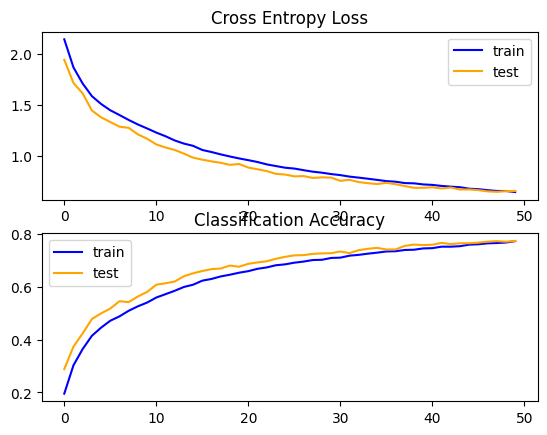

In [6]:
%%time
# entry point, run the test harness
run_test_harness()
